In [2]:
import yfinance as yf
from ripser import ripser, Rips
import persim 
from persim import plot_diagrams, PersistenceImager
from persim.landscapes import (
    PersLandscapeApprox,
    PersLandscapeExact,
    average_approx, 
    snap_pl, 
    plot_landscape,
    plot_landscape_simple
)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm
import numpy as np
from numpy import linalg as LA
import pandas as pd
from datetime import datetime, timedelta, date
def dates_to_index(dates):
    return [len(data_df[:date])-1 for date in dates]

In [57]:
#downloading data
#gspc is spy, ixic is qqq, dji is dow, rut is russel
data = yf.download("CL=F ^TNX DX-Y.NYB", start="2000-08-23", end="2021-08-20", interval = "1d", group_by = "ticker")
data_df = np.log(data.xs("Adj Close", level=1, axis=1).pct_change()+1)[1:].fillna(-40)
# price_data = data_df[["^GSPC", "^DJI", "^IXIC", "^RUT"]]

wins = [50, 100]

[*********************100%***********************]  3 of 3 completed


In [58]:
#calculate all cloud peris diagrams, then calculate landscape norm and store in array called norm_data
norm_data = np.zeros(len(data_df))
norm_data[:] = np.NaN
for i in tqdm(range(wins[0], len(data_df))):
    arr = data_df.to_numpy()[i-wins[0]:i]
    dgms = ripser(arr, maxdim=2)['dgms']
    norm_data[i] = PersLandscapeExact(dgms, hom_deg=1).p_norm()
# data_df["L2_Norm"] = norm_data
np.save("norm_data.npy", norm_data)

100%|██████████| 5225/5225 [00:58<00:00, 88.60it/s]


In [68]:
clean_data

,^GSPC,^VIX
Date,,
2000-08-23,1505.969971,17.379999
2000-08-24,1508.310059,17.040001
2000-08-25,1506.449951,16.530001
2000-08-28,1514.089966,16.540001
2000-08-29,1509.839966,16.889999
...,...,...
2021-08-16,4479.709961,16.120001
2021-08-17,4448.080078,17.910000
2021-08-18,4400.270020,21.570000


In [71]:
merged = data_df.merge(clean_data, how = 'outer', left_index=True, right_index=True)

for i in range(len(merged)-1):
    if merged

,^TNX,DX-Y.NYB,CL=F,^VIX,^GSPC
Date,,,,,
2000-08-24,-0.001573,-0.001707,-0.013191,17.040001,1508.310059
2000-08-25,0.000874,0.001078,0.013191,16.530001,1506.449951
2000-08-28,0.007835,0.000987,0.025263,16.540001,1514.089966
2000-08-29,0.007258,0.006617,-0.004574,16.889999,1509.839966
2000-08-30,-0.001378,-0.000535,0.020569,17.690001,1502.589966
...,...,...,...,...,...
2021-08-16,-0.031326,0.001188,-0.016946,16.120001,4479.709961
2021-08-17,0.000795,0.005383,-0.010457,17.910000,4448.080078
2021-08-18,0.011853,0.000107,-0.017115,21.570000,4400.270020


[*********************100%***********************]  2 of 2 completed


ValueError: x and y must have same first dimension, but have shapes (5273,) and (5281,)

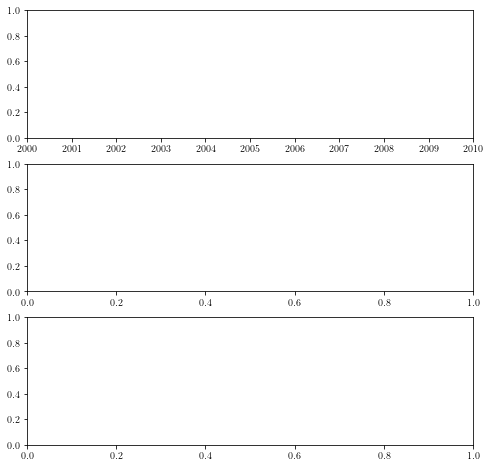

In [72]:
# Plotting spy, l2 norm, and vix price to see correlations

dates = ["2000-08-24", "2021-08-21"]
inds = dates_to_index(dates)


clean_data = yf.download("^GSPC ^VIX", start=dates[0], end=dates[1], interval = "1d", group_by = "ticker").xs("Adj Close", level=1, axis=1)

fig, axs = plt.subplots(3, 1)
fig_size = 8
fig.set_size_inches(fig_size, fig_size)

days = data_df.index[inds[0]:inds[1]][:-1]
axs[0].plot(days, clean_data["^GSPC"])
axs[0].set_title("SPY Closing Price")

axs[1].plot(days, norm_data[inds[0]:inds[1]]/np.max(norm_data[inds[0]:inds[1]]))
axs[1].set_title("L2 Norm")

axs[2].plot(days, clean_data["^VIX"])
axs[2].set_title("VIX Closing")

fig.tight_layout()